In [0]:
import operator, random, string
import matplotlib.pyplot as plt

In [0]:
def generate_char():
  return random.choice(string.ascii_lowercase)

def generate_word(n):
  word = ""
  for x in range(n):
    word += generate_char()
  return word
  

In [0]:


def fitness(individual, goal):
  points = 0
  for i in range(len(goal)):
    if individual[i] == goal[i]:
      points = points +1
  return points

def rank(population, fitness, goal):
  fitnessResults = {}
  for i in range(0,len(population)):
    fitnessResults[i] = fitness(population[i], goal)
  return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)
  

In [0]:
#Retorna una lista de los indices de los individuos seleccionados que dejaran herencia
#ranking: lista de los individuos rankeados (indice, fitness)
#elite: elitimismo
def selection(ranking, elite):
    selection = []
    suma = 0
    #Ruleta
    for i in range(len(ranking)):
      suma += ranking[i][1]
      
    for i in range(0, elite):
        selection.append(ranking[i][0])
        
    for i in range(0, len(ranking) - elite):
      current = 0
      p = random.uniform(0, suma)
      for i in range(0, len(ranking)):
        current += ranking[i][1]
        if current > p:
          selection.append(ranking[i][0])
          break
    return selection

#Retorna lista definitiva de los elementos seleccionados para dejar una nueva generacion
def selectionPopulation(population, selection):
  parents = []
  
  for i in range(len(selection)):
    index = selection[i]
    parents.append(population[index])
    
  return parents


#REPRODUCCION
def crossover(parent1, parent2):
  if(type(parent1)== str):
    child = ""
  else:
    child = []
  
  #genes para particion
  genA = int(random.random() * len(parent1))
  genB = int(random.random() * len(parent1))
  
  start = min(genA, genB)
  end = max(genA, genB)
  
  if(type(parent1)== str):
    for i in range(0, start):
      child += parent1[i]

    for i in range (start, end):
      child += parent2[i]

    for i in range (end, len(parent1)):
      child += parent1[i]
  else:
    for i in range(0, start):
      child.append(parent1[i])

    for i in range (start, end):
      child.append(parent2[i])

    for i in range (end, len(parent1)):
      child.append(parent1[i])
  
  return child
 
#retorna poblacion de descendientes  
def crossoverPopulation(parents, elite):
  children = []
  length = len(parents) - elite
  random_parents = random.sample(parents, len(parents))

  for i in range(0,elite):
    children.append(parents[i])
    
  for i in range(0, length):
    child = crossover(random_parents[i], random_parents[len(parents) -i -1])
    children.append(child)
  return children
  

In [0]:
#Muta un individuo
#mutatioRate = tasa de mutacion
#generate_gen = generador de genes

def mutate(individual, generate_gen, mutationRate):
  
  l = list(individual)
    
  for char in range(len(l)):
    if(random.random()<mutationRate):
      swap_char = generate_gen()
      l[char] = swap_char
 
  return "".join(l)

#Mutacion de una poblacion
def mutatePopulation(population, generate_gen, mutationRate):
  mutated = []
  
  for i in range(len(population)):
    mutated.append(mutate(population[i], generate_gen, mutationRate))
    
  return mutated

In [0]:
#Avanze de una generacion completo
def evolution(currentPopulation, generate_gen, fitness, elite, mutationRate, goal):
  ranking = rank(currentPopulation, fitness, goal)
  selected = selection(ranking, elite)
  parents = selectionPopulation(currentPopulation, selected)
  children = crossoverPopulation(parents, elite)
  nextPopulation = mutatePopulation(children, generate_gen, mutationRate)
  return nextPopulation

def average(ranking):
  suma = 0
  for i in range(len(ranking)):
    suma += ranking[i][1]
  return suma/ len(ranking)

def genetic_algorithm(pop_size, fitness, generate_gen, generate_ind, elite, mutationRate, generations, goal=None, heatmap=False):
  population = []
  progress = []
  worse = []
  avg = []
  
  N = float('inf')  
  
  if goal is not None:
    N = len(goal)  
    
  for i in range(0,pop_size):
    population.append(generate_ind(N))
      
  
  initialRank = rank(population, fitness, goal)
  progress.append(initialRank[0][1])
  worse.append(initialRank[-1][1])
  avg.append(average(initialRank))
  
  generation = generations
  for i in range(0, generations):
    population = evolution(population, generate_gen, fitness, elite, mutationRate, goal)
    currentRank = rank(population, fitness, goal)
    progress.append(currentRank[0][1])
    worse.append(currentRank[-1][1])
    avg.append(average(currentRank))
    if(currentRank[0][1] == N):
      generation = i
      break
    
  if(heatmap):
    return generation
  else:
    print(population[currentRank[0][0]])
    plt.plot(progress, "b", label="Progress")
    plt.plot(avg, "g", label="Average")
    plt.plot(worse, "r", label="Worse")
    plt.ylabel('Value')
    plt.xlabel('Generation')
    plt.title("Máximo, Mínimo y Promedio en el tiempo")

    legend = plt.legend(loc='best', shadow=True)

    # Put a nicer background color on the legend.
    plt.show()
    
  

helloworld


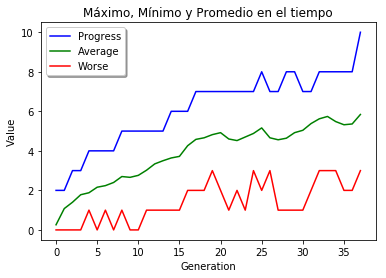

In [248]:
genetic_algorithm(pop_size=50, fitness=fitness, generate_gen=generate_char, generate_ind=generate_word, elite=10, mutationRate=0.15, generations=200, goal= "helloworld")

### Ejercicios

#### 1. Secuencia de bits



In [0]:
def generate_bit():
  if(random.random() >= 0.5):
    return "1"
  else:
    return "0"
  
def generate_sequence(n):
  seq = ""
  for x in range(n):
    seq += generate_bit()
  return seq
  

def fitness_bits(sequence, goal):
  points = 0
  for i in range(len(goal)):
    if sequence[i] == goal[i]:
      points = points +1
  return points

In [0]:
#genetic_algorithm(pop_size=100, fitness=fitness_bits, generate_gen=generate_bit,generate_ind= generate_sequence, elite=20, mutationRate=0.1, generations=150, goal="00101010110101")

## Problema: Unbound-Knapsack 

In [0]:
#Gen: cantidad de un determinado item que se agrega a la mochila
#Individuo: combinacion de todos los items que se agregaran a la mochila

C = 15 #peso maximo mochila

class Item:
  def __init__(self, weight, value):
    self.w = weight
    self.v = value
    
#items disponibles
items = [Item(12, 4), Item(2,2), Item(1,2), Item(1,1), Item(4, 10)] 

#generador de genes
def generate_count(item, limit):
  return int(random.uniform(0, int(limit/item.w)+1)) #Como un item i pesa w, a lo mas se pueden colocar int(C/w) items i


#Generador de individuos
#Si la combinacion supera el peso maximo (C), se quita un item al azar hasta que se cumpla la restriccion
def generate_combination():
  comb = []
  for item in items:
    comb.append(generate_count(item, C))
  
  while(restrictionWeight(comb, C) is False):
    target = int(random.uniform(0,5))
    comb[target] = max(0, comb[target]-1)
  return comb


    
def restrictionWeight(combination, limit):
  sum = 0
  for i in range(0, len(items)):
    sum+= int(combination[i])*items[i].w
  
  return limit >= sum



def fitness_items(combination, goal=None):
  points = 0
  for i in range(0,len(combination)):
    points += combination[i]* items[i].v
    
  return points
  
  

In [0]:
def mutateUnbound(individual, generate_gen, mutationRate):
  l = individual
    
  for char in range(len(l)):
    if(random.random()<mutationRate):
      swap_char = generate_gen(items[char],C)
      l[char] = swap_char
  
  while(restrictionWeight(l, C) is False):
    target = int(random.uniform(0,5))
    l[target] = max(0, l[target]-1)
  return l

#Mutacion de una poblacion
def mutatePopulationUnbound(population, generate_gen, mutationRate):
  mutated = []
  
  for i in range(len(population)):
    mutated.append(mutateUnbound(population[i], generate_gen, mutationRate))  
  return mutated

In [0]:
def evolution_unbound(currentPopulation, generate_gen, fitness, elite, mutationRate, goal):
  ranking = rank(currentPopulation, fitness, goal)
  selected = selection(ranking, elite)
  parents = selectionPopulation(currentPopulation, selected)
  children = crossoverPopulation(parents, elite)
  nextPopulation = mutatePopulationUnbound(children, generate_gen, mutationRate)
  return nextPopulation

In [0]:
def genetic_algorithm_unbound(pop_size, fitness, generate_gen, generate_ind, elite, mutationRate, generations, goal=None):
  population = []
  progress = []
  worse = []
  avg = []
  
  N = float('inf')  
  
  if goal is not None:
    N = len(goal)  
    
  for i in range(0,pop_size):
      population.append(generate_ind())
    
  initialRank = rank(population, fitness, goal)
  progress.append(initialRank[0][1])
  worse.append(initialRank[-1][1])
  avg.append(average(initialRank))
  
  for i in range(0, generations):
    population = evolution_unbound(population, generate_gen, fitness, elite, mutationRate, goal)
    currentRank = rank(population, fitness, goal)
    progress.append(currentRank[0][1])
    worse.append(currentRank[-1][1])
    avg.append(average(currentRank))
    
  
  
  print(population[currentRank[0][0]])
      
    
  
  plt.plot(progress, "b", label="Progress")
  plt.plot(avg, "g", label="Average")
  plt.plot(worse, "r", label="Worse")
  plt.ylabel('Value')
  plt.xlabel('Generation')
  plt.title("Máximo, Mínimo y Promedio en el tiempo")
  
  legend = plt.legend(loc='best', shadow=True)

  plt.show()

In [0]:
#genetic_algorithm_unbound(pop_size=15, fitness=fitness_items, generate_gen=generate_count,generate_ind= generate_combination, elite=5, mutationRate=0.1, generations=100, goal="None")

In [0]:
def heatmap():
  i = 50
  size = []
  generations = []
  while(i <= 1000):
    size.append(i)
    generations.append(genetic_algorithm(pop_size=i, fitness=fitness, generate_gen=generate_char, generate_ind=generate_word, elite=10, mutationRate=0.15, generations=200, goal= "helloworld", heatmap=True))
    i += 50
    
  plt.plot(size, generations,color='r', label='Tiempo')
  plt.ylabel('Generation')
  plt.xlabel('Population Size')
  plt.title("Generación de éxito v/s tamaño de la población")
  
  plt.show()

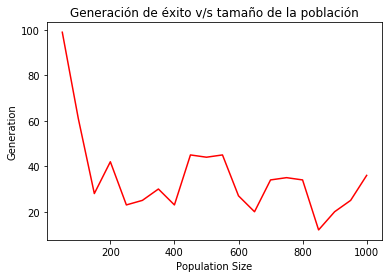

In [257]:
heatmap()

In [0]:
def heatmap2():
  i = 0.1
  size = []
  generations = []
  while(i <= 1):
    size.append(i)
    generations.append(genetic_algorithm(pop_size= 50, fitness=fitness, generate_gen=generate_char, generate_ind=generate_word, elite=10, mutationRate=i, generations=300, goal= "helloworld", heatmap=True))
    i += 0.1
    
  plt.plot(size, generations,color='r', label='Tiempo')
  plt.ylabel('Generation')
  plt.xlabel('Mutation Rate')
  plt.title("Generación de éxito v/s tasa de mutación")
  
  plt.show()

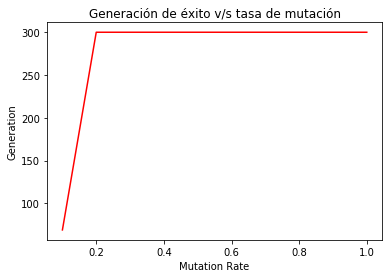

In [259]:
heatmap2()